В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі чотири лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import pandas as pd
medical_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/medical-charges.csv") # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [21]:
X = non_smoker_df['age'].values
y = non_smoker_df['charges'].values

Метод МНК

Coefficient (beta_1): 267.25
Intercept (beta_0): -2091.42
RMSE: 4662.51


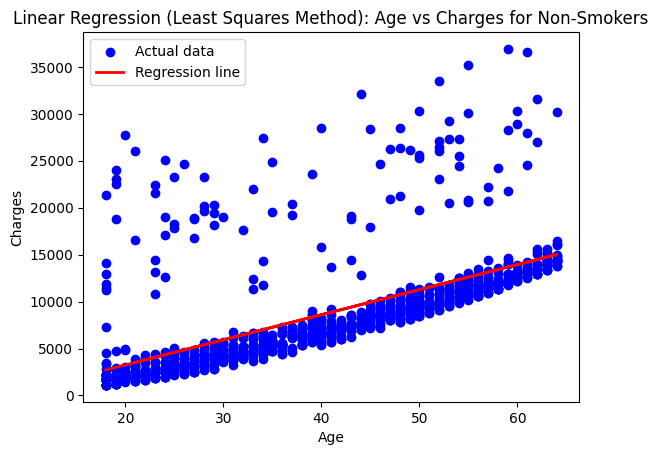

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Обчислення середніх значень
x_mean = np.mean(X)
y_mean = np.mean(y)

# Обчислення коефіцієнта β1
numerator = np.sum((X - x_mean) * (y - y_mean))
denominator = np.sum((X - x_mean) ** 2)
beta_1 = numerator / denominator

# Обчислення перехоплення β0
beta_0 = y_mean - beta_1 * x_mean

print(f'Coefficient (beta_1): {beta_1:.2f}')
print(f'Intercept (beta_0): {beta_0:.2f}')

# Прогнозування значень
y_pred = beta_0 + beta_1 * X

# Оцінка точності моделі (RMSE)
rmse = np.sqrt(np.mean((y - y_pred) ** 2))
print(f'RMSE: {rmse:.2f}')

# Візуалізація
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Linear Regression (Least Squares Method): Age vs Charges for Non-Smokers')
plt.legend()
plt.show()

Full-Batch градієнтного спуску

<ipython-input-25-491a046c4a22>:19: RuntimeWarning: overflow encountered in square
  loss = np.mean(error ** 2)
<ipython-input-25-491a046c4a22>:26: RuntimeWarning: invalid value encountered in subtract
  beta -= learning_rate * gradient


Learning Rate: 0.001
Coefficients: [nan nan]
RMSE: nan
Learning Rate: 0.0001
Coefficients: [-41.98126853 221.10458438]
RMSE: 4713.25
Learning Rate: 1e-05
Coefficients: [2.13006528e-01 2.20154556e+02]
RMSE: 4715.35


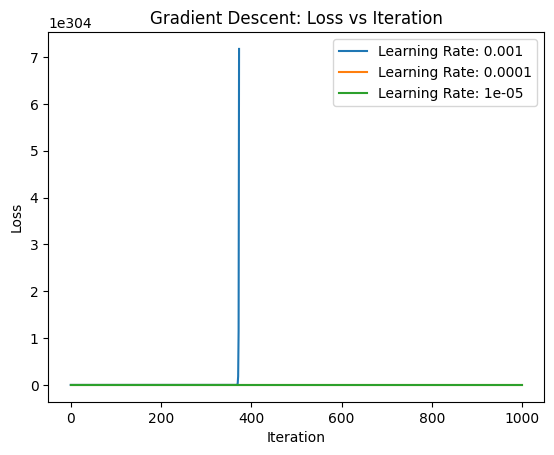

In [25]:
def gradient_descent(X, y, learning_rate, epochs):
    # Ініціалізація коефіцієнтів
    beta = np.zeros(X.shape[1])

    # Кількість спостережень
    n = len(X)

    # Масив для зберігання значень функції втрат на кожній ітерації
    loss_history = []

    for i in range(epochs):
        # Обчислення прогнозів
        y_pred = np.dot(X, beta)

        # Обчислення помилок прогнозу
        error = y_pred - y

        # Обчислення значення функції втрат (середньоквадратична помилка)
        loss = np.mean(error ** 2)
        loss_history.append(loss)

        # Обчислення градієнту
        gradient = (2 / n) * np.dot(X.T, error)

        # Оновлення коефіцієнтів за допомогою градієнтного спуску
        beta -= learning_rate * gradient

    return beta, loss_history

# Трансформація даних
X_transformed = np.column_stack((np.ones(len(X)), X))

# Параметри градієнтного спуску
learning_rates = [0.001, 0.0001, 0.00001]
epochs = 1000

# Запуск градієнтного спуску для кожного learning rate
for rate in learning_rates:
    # Запуск градієнтного спуску
    beta, loss_history = gradient_descent(X_transformed, y, rate, epochs)

    # Виведення коефіцієнтів моделі
    print(f'Learning Rate: {rate}')
    print(f'Coefficients: {beta}')

    # Обчислення прогнозів
    y_pred = np.dot(X_transformed, beta)

    # Обчислення RMSE
    rmse = np.sqrt(np.mean((y - y_pred) ** 2))
    print(f'RMSE: {rmse:.2f}')

    # Виведення графіка помилки
    plt.plot(range(epochs), loss_history, label=f'Learning Rate: {rate}')

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Gradient Descent: Loss vs Iteration')
plt.legend()
plt.show()

Scikit-learn.LinearRegression

Coefficient: 267.2489128311997
Intercept: -2091.4205565650864
RMSE: 4662.51
R^2 Score: 0.39


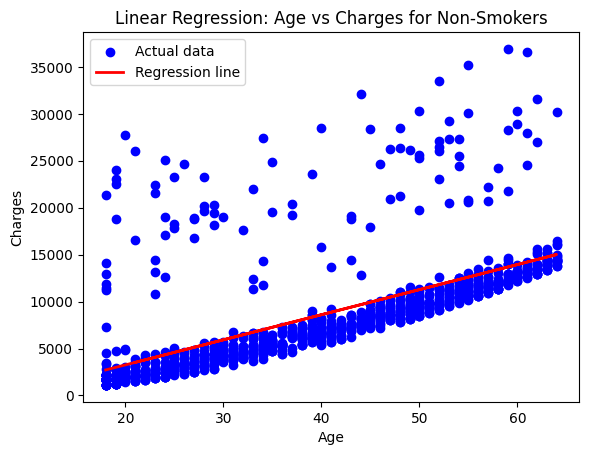

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Виділяємо змінні
X = non_smoker_df['age'].values.reshape(-1, 1)  # Перетворюємо в одновимірний масив та змінюємо форму на двовимірну
y = non_smoker_df['charges']

# Створюємо і навчаємо модель
model = LinearRegression()
model.fit(X, y)

# Виводимо коефіцієнти
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Робимо прогнози
y_pred = model.predict(X)

# Оцінюємо точність моделі (RMSE)
rmse = np.sqrt(np.mean((y - y_pred) ** 2))
print(f"RMSE: {rmse:.2f}")

# Оцінюємо модель
r2_score = model.score(X, y)
print(f"R^2 Score: {r2_score:.2f}")

# Візуалізація
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Linear Regression: Age vs Charges for Non-Smokers')
plt.legend()
plt.show()

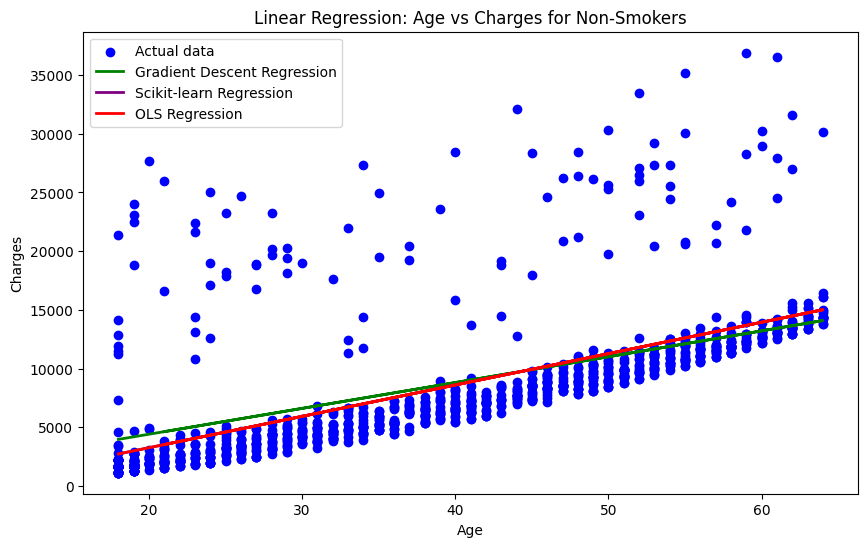

In [29]:
# Виділяємо змінні
X = non_smoker_df['age'].values.reshape(-1, 1)  # Перетворюємо в одновимірний масив та змінюємо форму на двовимірну
y = non_smoker_df['charges']

# Метод найменших квадратів
model_ols = LinearRegression()
model_ols.fit(X, y)
y_pred_ols = model_ols.predict(X)

# Градієнтний спуск з найкращим learning rate
learning_rate = 0.00001
epochs = 1000
X_transformed = np.column_stack((np.ones(len(X)), X))
beta_gd, _ = gradient_descent(X_transformed, y, learning_rate, epochs)
y_pred_gd = np.dot(X_transformed, beta_gd)

# Scikit-learn Linear Regression (завданням)
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)
y_pred_sklearn = model_sklearn.predict(X)

# Візуалізація
plt.figure(figsize=(10, 6))

# Діаграма розсіювання
plt.scatter(X, y, color='blue', label='Actual data')

# Лінії регресії
plt.plot(X, y_pred_gd, color='green', linewidth=2, label='Gradient Descent Regression')
plt.plot(X, y_pred_sklearn, color='purple', linewidth=2, label='Scikit-learn Regression')
plt.plot(X, y_pred_ols, color='red', linewidth=2, label='OLS Regression')

plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Linear Regression: Age vs Charges for Non-Smokers')
plt.legend()
plt.show()

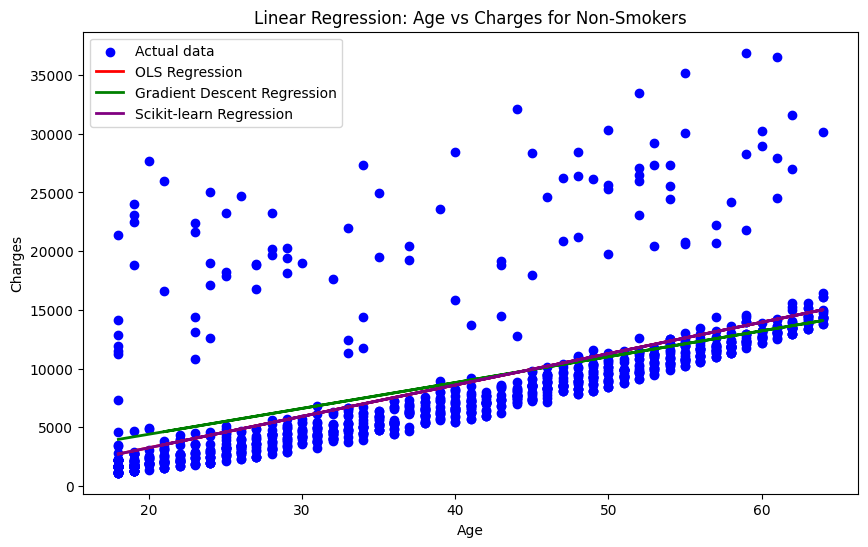

In [30]:
plt.figure(figsize=(10, 6))

# Діаграма розсіювання
plt.scatter(X, y, color='blue', label='Actual data')

# Лінії регресії
plt.plot(X, y_pred_ols, color='red', linewidth=2, label='OLS Regression')
plt.plot(X, y_pred_gd, color='green', linewidth=2, label='Gradient Descent Regression')
plt.plot(X, y_pred_sklearn, color='purple', linewidth=2, label='Scikit-learn Regression')

plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Linear Regression: Age vs Charges for Non-Smokers')
plt.legend()
plt.show()

Висновок
 Метод найменших квадратів (МНК) та Scikit-learn.LinearRegression показали схожі результати: коефіцієнти та RMSE майже ідентичні. Це може свідчити про те, що обидва методи добре підходять для моделювання цих даних і можуть бути надійними у використанні.

Full-Batch градієнтний спуск не дав здійснити точні прогнози, навіть при різних швидкостях навчання (learning rates). Навіть найкращий learning rate (0.0001) не зміг забезпечити прийнятну точність моделі, а RMSE було досить великим. Це може бути пов'язано з тим, що дані можуть бути надто складні для оптимального навчання за допомогою градієнтного спуску.

Отже, для цього конкретного набору даних найбільш надійними методами є МНК та Scikit-learn.LinearRegression. Градієнтний спуск не виявився ефективним для цього завдання.

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

R^2 Score: 0.44
Coefficient: 265.04
Intercept: -1995.55


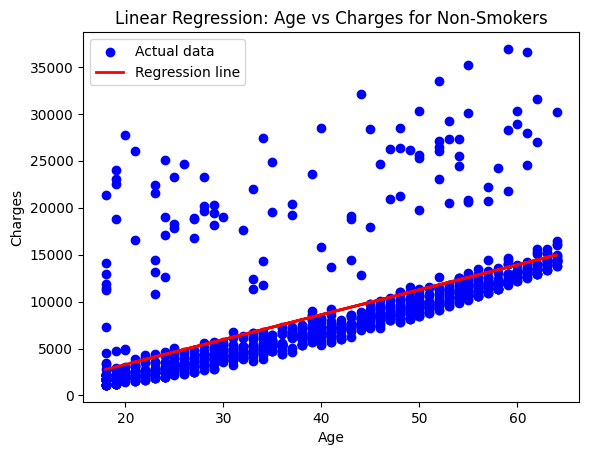

In [9]:
# Виділяємо змінні
X = non_smoker_df['age'].values.reshape(-1, 1)
y = non_smoker_df['charges'].values
# Розділяємо дані на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Навчаємо модель
model = LinearRegression()
model.fit(X_train, y_train)

# Оцінюємо точність моделі
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2:.2f}')

# Виводимо коефіцієнти
coef = model.coef_
intercept = model.intercept_
print(f'Coefficient: {coef[0]:.2f}')
print(f'Intercept: {intercept:.2f}')

# Візуалізуємо модель
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression line')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Linear Regression: Age vs Charges for Non-Smokers')
plt.legend()
plt.show()# Розділяємо дані на тренувальну та тестову вибірки

Точність моделі (R^2 Score):

Значення R^2 score 0.44 означає, що модель пояснює приблизно 44% варіацій у даних. Це не дуже високий показник, що вказує на те, що модель не дуже добре описує залежність між віком та медичними зборами для некурців.
Інші фактори, окрім віку, ймовірно, мають значний вплив на медичні збори і не враховані в цій моделі.
Коефіцієнт:

Коефіцієнт 265.04 вказує на те, що при збільшенні віку на один рік медичні збори для некурців в середньому збільшуються на 265.04 одиниці.
Це значуща зміна, але необхідно врахувати, що цей коефіцієнт може не повністю відображати всі фактори, що впливають на медичні збори.
Перехоплення:

Перехоплення -1995.55 означає, що для віку 0 років модель прогнозує негативні медичні збори, що в реальних умовах є нереалістичним і свідчить про те, що модель може бути недосконалою для малих значень віку.
Чи використовувати цю модель у компанії?

Отже, значення R^2 0.44 означає, що модель не є достатньо точною для серйозних прогнозів або прийняття рішень на її основі.Варто розглянути додавання інших змінних (наприклад, індекс маси тіла (BMI), стать, регіон) для покращення моделі.